## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [41]:
x_train.shape

(60000, 28, 28)

In [43]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [44]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [46]:
x_train.shape

(60000, 28, 28, 1)

### Normalize both the train and test image data from 0-255 to 0-1

In [47]:
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [48]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))



### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

### Now, to the above model, lets add Data Augmentation 

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [85]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]


model.fit(x_train, y_train,
          epochs=10,
          callbacks=callback_list, 
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.4753 - acc: 0.8314 - val_loss: 0.3206 - val_acc: 0.8809
Epoch 2/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.3172 - acc: 0.8842 - val_loss: 0.2646 - val_acc: 0.9020
Epoch 3/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.2712 - acc: 0.9021 - val_loss: 0.2441 - val_acc: 0.9108
Epoch 4/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.2396 - acc: 0.9114 - val_loss: 0.2313 - val_acc: 0.9175
Epoch 5/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.2196 - acc: 0.9200 - val_loss: 0.2261 - val_acc: 0.9168
Epoch 6/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.1988 - acc: 0.9263 - val_loss: 0.2148 - val_acc: 0.9227
Epoch 7/10
60000/60000 [==============================] - 21s 357us/step - loss: 0.1832 - acc: 0.9320 - val_loss: 0.

In [86]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23130144666433333
Test accuracy: 0.9196


### Import the ImageDataGenrator from keras and fit the training images

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

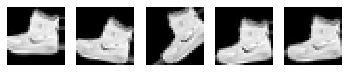

In [87]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [88]:
datagen.fit(x_train)
model.fit_generator(datagen.flow(x_train, y_train),
          epochs=10,
          callbacks=callback_list, 
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.8495 - acc: 0.6893 - val_loss: 0.3543 - val_acc: 0.8764
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.6520 - acc: 0.7591 - val_loss: 0.3385 - val_acc: 0.8808
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.6021 - acc: 0.7790 - val_loss: 0.3458 - val_acc: 0.8746
Epoch 4/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5600 - acc: 0.7939 - val_loss: 0.3476 - val_acc: 0.8762
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5430 - acc: 0.8012 - val_loss: 0.3609 - val_acc: 0.8719
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5255 - acc: 0.8085 - val_loss: 0.3489 - val_acc: 0.8794
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5080 - acc: 0.8153 - val_loss: 0.3398 - val_acc: 0.8838
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [89]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3238080297589302
Test accuracy: 0.8859


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:

from matplotlib import pyplot
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [91]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [92]:
trainX.shape

(50000, 32, 32, 3)

In [93]:
testX.shape

(10000, 32, 32, 3)

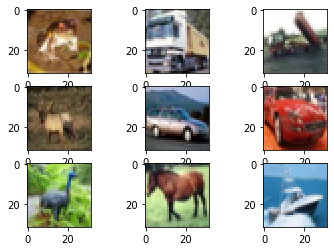

In [96]:

for i in range(9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(trainX[i])
pyplot.show()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen2 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

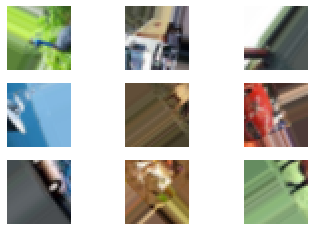

In [107]:
gen2 = datagen2.flow(trainX[0:9], batch_size=1)
for i in range(1, 10):
    plt.subplot(3,3,i)
    plt.axis("off")
    plt.imshow(gen2.next().squeeze().astype('uint8'))
    plt.plot()
plt.show()

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

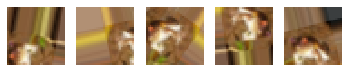

In [112]:
gen2 = datagen2.flow(trainX[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen2.next().squeeze().astype('uint8'))
    plt.plot()
plt.show()